#### **Instalimi dhe Importimi i librarive*

In [371]:
# %pip install pandas numpy matplotlib seaborn scikit-learn missingno


In [372]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew

from imblearn.over_sampling import SMOTE
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)  # do përdorë deri 4 core



#### Ngarkimi i datasetit

In [373]:
# Ngarkimi i datasetit nga csv file per analize.
dataset_kryesor = pd.read_csv('data/DatasetKryesor.csv', encoding='latin1')

#### Numrimi i rreshtave dhe atributeve ne dataset

In [374]:
# Dimensionet e dataset
dataset_kryesor.shape

(54161, 13)

#### Paraqitja e atributeve te dataset

In [375]:
# atributet e dataset
dataset_kryesor.columns

Index(['Spitali', 'NjesiaReparti', 'Numri', 'Shenim', 'DataRegjistrimit',
       'Artikulli', 'ArtikulliLloji', 'RrugaMarrjes', 'Sasia', 'Cmimi',
       'Vlera', 'OperatoriEkonomik', 'LlojiHyrjes'],
      dtype='object')

#### Rreshtat e pare te dataset

In [376]:
# Paraqitja e pese rreshtave te pare te dataset
dataset_kryesor.head()

,Spitali,NjesiaReparti,Numri,Shenim,DataRegjistrimit,Artikulli,ArtikulliLloji,RrugaMarrjes,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 1,Njesia e Ortopedisë,1140/2024,Dalje,2024-03-04 00:00:00.000,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,INTRAMUSCULAR AND INTRAVENOUS USE,200.0,0.09,18.0,OE 28,Grant qeveritar
1,Spitali 1,Njesia e Ortopedisë,1145/2024,Dalje,2024-03-04 00:00:00.000,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,Barna,//,40.0,0.54,21.6,OE 54,Grant qeveritar
2,Spitali 1,Njesia e Ortopedisë,1402/2024,Dalje,2024-03-18 00:00:00.000,J01XD01 - Metronidazole 500mg - Injeksion,Barna,//,200.0,0.48,96.0,OE 54,Grant qeveritar
3,Spitali 1,Njesia e Ortopedisë,1402/2024,Dalje,2024-03-18 00:00:00.000,C03CA01 - Furosemide 40mg - Tabletë,Barna,Oral use,120.0,0.03,3.6,OE 28,Grant qeveritar
4,Spitali 1,Njesia e Ortopedisë,1568/2024,Dalje,2024-03-25 00:00:00.000,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,200.0,0.36,72.0,OE 5,Grant qeveritar


### Tipet e te dhenave per atribute

In [377]:
# Tipet e te dhenave
dataset_kryesor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54161 entries, 0 to 54160
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Spitali            54161 non-null  object 
 1   NjesiaReparti      54161 non-null  object 
 2   Numri              54161 non-null  object 
 3   Shenim             54161 non-null  object 
 4   DataRegjistrimit   54161 non-null  object 
 5   Artikulli          54160 non-null  object 
 6   ArtikulliLloji     54161 non-null  object 
 7   RrugaMarrjes       54161 non-null  object 
 8   Sasia              54128 non-null  float64
 9   Cmimi              54128 non-null  float64
 10  Vlera              54131 non-null  float64
 11  OperatoriEkonomik  54161 non-null  object 
 12  LlojiHyrjes        54161 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.4+ MB


#### Paraqitja e kolonave me Vlerat NULL

In [378]:
# Checking for missing data in all columns
missing_data = dataset_kryesor.isnull().sum()

print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Spitali               0
NjesiaReparti         0
Numri                 0
Shenim                0
DataRegjistrimit      0
Artikulli             1
ArtikulliLloji        0
RrugaMarrjes          0
Sasia                33
Cmimi                33
Vlera                30
OperatoriEkonomik     0
LlojiHyrjes           0
dtype: int64


### Kontrollimi i vlerave unike për secilin atribut (shumë e dobishme për variabla kategorike)

In [379]:
for col in dataset_kryesor.columns:
    unique_values = dataset_kryesor[col].nunique()
    print(f'Atributi "{col}" ka {unique_values} vlera unike.')

Atributi "Spitali" ka 8 vlera unike.
Atributi "NjesiaReparti" ka 36 vlera unike.
Atributi "Numri" ka 5622 vlera unike.
Atributi "Shenim" ka 169 vlera unike.
Atributi "DataRegjistrimit" ka 274 vlera unike.
Atributi "Artikulli" ka 1063 vlera unike.
Atributi "ArtikulliLloji" ka 3 vlera unike.
Atributi "RrugaMarrjes" ka 22 vlera unike.
Atributi "Sasia" ka 1138 vlera unike.
Atributi "Cmimi" ka 883 vlera unike.
Atributi "Vlera" ka 5338 vlera unike.
Atributi "OperatoriEkonomik" ka 67 vlera unike.
Atributi "LlojiHyrjes" ka 4 vlera unike.


### Shikimi i statistikave për kolonat numerike (me .describe())

In [380]:
print("Statistikat për kolonat kategorike:")
print(dataset_kryesor.describe(include=['O']))  # 'O' qëndron për 'Object' (teksti)

Statistikat për kolonat kategorike:
          Spitali        NjesiaReparti      Numri Shenim  \
count       54161                54161      54161  54161   
unique          8                   36       5622    169   
top     Spitali 1  Njesia e Kirurgjisë  1512/2024  Dalje   
freq        14888                 7304         78  52251   

               DataRegjistrimit  \
count                     54161   
unique                      274   
top     2024-12-26 00:00:00.000   
freq                        392   

                                                Artikulli ArtikulliLloji  \
count                                               54160          54161   
unique                                               1063              3   
top     B05XA03 - Natrium chloride  0.9%/100ml - Solut...          Barna   
freq                                                 1806          50085   

       RrugaMarrjes OperatoriEkonomik      LlojiHyrjes  
count         54161             54161            

### Identifikimi i kolonave kategorike dhe numerike (automatikisht)

In [381]:
kategorike = dataset_kryesor.select_dtypes(include=['object']).columns
numerike = dataset_kryesor.select_dtypes(include=['int64', 'float64']).columns

print("Kolonat kategorike:", kategorike)
print("Kolonat numerike:", numerike)

Kolonat kategorike: Index(['Spitali', 'NjesiaReparti', 'Numri', 'Shenim', 'DataRegjistrimit',
       'Artikulli', 'ArtikulliLloji', 'RrugaMarrjes', 'OperatoriEkonomik',
       'LlojiHyrjes'],
      dtype='object')
Kolonat numerike: Index(['Sasia', 'Cmimi', 'Vlera'], dtype='object')


### Analiza e shpërndarjes për kolonën "Spitali"

In [382]:
dataset_kryesor['Spitali'].value_counts().sort_index()

Spitali
Spitali 1    14888
Spitali 2     3252
Spitali 3     8316
Spitali 4    10018
Spitali 5     1782
Spitali 6     4379
Spitali 7    10002
Spitali 8     1524
Name: count, dtype: int64

#### Analiza e shpërndarjes për kolonën "NjesiaReparti"

In [383]:
dataset_kryesor['NjesiaReparti'].value_counts().sort_index()

NjesiaReparti
Njesia e Alergologjisë dhe Imunologjisë             95
Njesia e Ambulancës Specialistike                  208
Njesia e Anestezeologjisë                         1687
Njesia e Anesteziologjisë dhe Emergjencës         1503
Njesia e Biokimisë Mjekësore                      1281
Njesia e Dermatologjisë                            123
Njesia e Emergjencës                              5531
Njesia e Fizioterapisë                              26
Njesia e Gjinekologjisë me Obstetrikë             4275
Njesia e Hemodializës                             2067
Njesia e Infektivës                               1925
Njesia e Internos                                 6785
Njesia e Kirurgjisë                               7304
Njesia e Kujdesit Intenziv                        3454
Njesia e Mjekësisë Nukleare                        124
Njesia e Mjekësisë së Punës                         13
Njesia e Neonatologjisë                            943
Njesia e Neurologjisë                             1

#### Analiza e shpërndarjes për kolonën "Artikulli"

In [384]:
dataset_kryesor['Artikulli'].value_counts()

Artikulli
B05XA03 - Natrium chloride  0.9%/100ml - Solution for infusion              1806
B05AA01 - Human Albumin 20%/50ml - Solution for infusion                    1710
B05XA03 - Natrium chloride  0.9% 500 ml izotonik - Solution for infusion    1600
J01DD04 - ceftriaxone 1g - Pluhur për injeksion                             1564
B01AB - Enoxaparin 40mg/0.4ml - Injeksion                                   1402
                                                                            ... 
RG224 - Total PSA  4x1ml - Other                                               1
RG95 - MbriDA (EHIDA) // - Ampullë                                             1
RG126 - Erlich aldehid x1000 ml x1000 ml - Other                               1
RG804 - PreciControl Vitamin D total II r  6 x 1.0 mL  - Other                 1
A12AA03 - calcium gluconate 100mg/mL - Injeksion                               1
Name: count, Length: 1063, dtype: int64

#### Analiza e shpërndarjes për kolonën "ArtikulliLloji"

In [385]:
dataset_kryesor['ArtikulliLloji'].value_counts()

ArtikulliLloji
Barna          50085
Reagenc         2613
Citostatikë     1463
Name: count, dtype: int64

#### Analiza e shpërndarjes për kolonën "OperatoriEkonomik"

In [386]:
dataset_kryesor['OperatoriEkonomik'].value_counts()

OperatoriEkonomik
OE 5     7842
OE 6     5323
OE 64    5254
OE 28    4180
OE 8     3598
         ... 
OE 33      10
OE 65       8
OE 15       8
OE 27       7
OE 67       1
Name: count, Length: 67, dtype: int64

#### Analiza e shpërndarjes për kolonën "LlojiHyrjes"

In [387]:
dataset_kryesor['LlojiHyrjes'].value_counts()

LlojiHyrjes
Grant qeveritar           49952
Hyrje vetanake             2883
Para te gatshme (Cash)      694
Donacion                    632
Name: count, dtype: int64

#### Konvertimi i Dates se regjistrimit ne format datetime short

In [388]:
dataset_kryesor['DataRegjistrimit'] = pd.to_datetime(dataset_kryesor['DataRegjistrimit'])
current_date = datetime(2024, 1, 1)
print(dataset_kryesor[['DataRegjistrimit']])

      DataRegjistrimit
0           2024-03-04
1           2024-03-04
2           2024-03-18
3           2024-03-18
4           2024-03-25
...                ...
54156       2024-06-01
54157       2024-09-30
54158       2024-03-15
54159       2024-05-24
54160       2024-09-17

[54161 rows x 1 columns]


#### Fshirja e rreshtave me NULL te kolona Artikulli

In [389]:
datasets = {
    'dataset_kryesor': dataset_kryesor
}

# Emrat e kolonave të ID-ve për çdo dataset
id_columns = {
    'dataset_kryesor': 'Artikulli'
}

for name, df in datasets.items():
    id_col = id_columns[name]
    # Fshij rreshtat me null
    cleaned_df = df[(df[id_col] != 0) & (df[id_col].notnull())]
    datasets[name] = cleaned_df

# Tani mund të aksesosh datasetet e pastra
dataset_kryesor = datasets['dataset_kryesor']

display(dataset_kryesor)

dataset_kryesor.shape

,Spitali,NjesiaReparti,Numri,Shenim,DataRegjistrimit,Artikulli,ArtikulliLloji,RrugaMarrjes,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 1,Njesia e Ortopedisë,1140/2024,Dalje,2024-03-04,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,INTRAMUSCULAR AND INTRAVENOUS USE,200.0,0.09,18.00,OE 28,Grant qeveritar
1,Spitali 1,Njesia e Ortopedisë,1145/2024,Dalje,2024-03-04,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,Barna,//,40.0,0.54,21.60,OE 54,Grant qeveritar
2,Spitali 1,Njesia e Ortopedisë,1402/2024,Dalje,2024-03-18,J01XD01 - Metronidazole 500mg - Injeksion,Barna,//,200.0,0.48,96.00,OE 54,Grant qeveritar
3,Spitali 1,Njesia e Ortopedisë,1402/2024,Dalje,2024-03-18,C03CA01 - Furosemide 40mg - Tabletë,Barna,Oral use,120.0,0.03,3.60,OE 28,Grant qeveritar
4,Spitali 1,Njesia e Ortopedisë,1568/2024,Dalje,2024-03-25,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,200.0,0.36,72.00,OE 5,Grant qeveritar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 8,Njesia e Shërbimeve Teknike,229/2024,Dalje,2024-06-01,V03AN010 - oxygen (gaz medicinal) - Inhalim,Barna,INHALATION USE,2368.0,0.43,1018.24,OE 57,Grant qeveritar
54157,Spitali 8,Njesia e Shërbimeve Teknike,394/2024,Dalje,2024-09-30,N01AX13 - Nitrous oxide kg - Inhalim,Barna,Oral use,120.0,7.90,948.00,OE 38,Grant qeveritar
54158,Spitali 8,Njesia e Shërbimeve Teknike,89/2024,Dalje,2024-03-15,N01AX13 - Nitrous oxide kg - Inhalim,Barna,Oral use,100.0,7.90,790.00,OE 38,Grant qeveritar
54159,Spitali 8,Njesia e Shërbimeve Teknike,207/2024,Dalje,2024-05-24,N01AX13 - Nitrous oxide kg - Inhalim,Barna,Oral use,100.0,7.90,790.00,OE 38,Grant qeveritar


(54160, 13)

#### Fshirja e rreshtave me NULL te kolona Sasia, Çmimi dhe Vlera

In [390]:
# Emrat e kolonave që duhet të jenë jo-null
columns_to_check = ['Sasia', 'Cmimi', 'Vlera']

# Fshij rreshtat që kanë vlera NULL në ndonjë nga kolonat e listuara
dataset_kryesor = dataset_kryesor.dropna(subset=columns_to_check)

# Shfaq datasetin e pastruar
display(dataset_kryesor)


,Spitali,NjesiaReparti,Numri,Shenim,DataRegjistrimit,Artikulli,ArtikulliLloji,RrugaMarrjes,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 1,Njesia e Ortopedisë,1140/2024,Dalje,2024-03-04,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,INTRAMUSCULAR AND INTRAVENOUS USE,200.0,0.09,18.00,OE 28,Grant qeveritar
1,Spitali 1,Njesia e Ortopedisë,1145/2024,Dalje,2024-03-04,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,Barna,//,40.0,0.54,21.60,OE 54,Grant qeveritar
2,Spitali 1,Njesia e Ortopedisë,1402/2024,Dalje,2024-03-18,J01XD01 - Metronidazole 500mg - Injeksion,Barna,//,200.0,0.48,96.00,OE 54,Grant qeveritar
3,Spitali 1,Njesia e Ortopedisë,1402/2024,Dalje,2024-03-18,C03CA01 - Furosemide 40mg - Tabletë,Barna,Oral use,120.0,0.03,3.60,OE 28,Grant qeveritar
4,Spitali 1,Njesia e Ortopedisë,1568/2024,Dalje,2024-03-25,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,200.0,0.36,72.00,OE 5,Grant qeveritar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 8,Njesia e Shërbimeve Teknike,229/2024,Dalje,2024-06-01,V03AN010 - oxygen (gaz medicinal) - Inhalim,Barna,INHALATION USE,2368.0,0.43,1018.24,OE 57,Grant qeveritar
54157,Spitali 8,Njesia e Shërbimeve Teknike,394/2024,Dalje,2024-09-30,N01AX13 - Nitrous oxide kg - Inhalim,Barna,Oral use,120.0,7.90,948.00,OE 38,Grant qeveritar
54158,Spitali 8,Njesia e Shërbimeve Teknike,89/2024,Dalje,2024-03-15,N01AX13 - Nitrous oxide kg - Inhalim,Barna,Oral use,100.0,7.90,790.00,OE 38,Grant qeveritar
54159,Spitali 8,Njesia e Shërbimeve Teknike,207/2024,Dalje,2024-05-24,N01AX13 - Nitrous oxide kg - Inhalim,Barna,Oral use,100.0,7.90,790.00,OE 38,Grant qeveritar


#### Reduktimi i dimensionalitetit të dataset_kryesor me largimin e kolonave që nuk duhen për analizë të mëtejshme.

In [391]:
# atributet qe do te largohen nga dataset
kolonat_per_fshirje = ['Numri','Shenim', 'RrugaMarrjes'
                   ]
dataset_kryesor= dataset_kryesor.drop(columns=kolonat_per_fshirje,axis=1)
dataset_kryesor.head()
display(dataset_kryesor)

,Spitali,NjesiaReparti,DataRegjistrimit,Artikulli,ArtikulliLloji,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 1,Njesia e Ortopedisë,2024-03-04,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,200.0,0.09,18.00,OE 28,Grant qeveritar
1,Spitali 1,Njesia e Ortopedisë,2024-03-04,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,Barna,40.0,0.54,21.60,OE 54,Grant qeveritar
2,Spitali 1,Njesia e Ortopedisë,2024-03-18,J01XD01 - Metronidazole 500mg - Injeksion,Barna,200.0,0.48,96.00,OE 54,Grant qeveritar
3,Spitali 1,Njesia e Ortopedisë,2024-03-18,C03CA01 - Furosemide 40mg - Tabletë,Barna,120.0,0.03,3.60,OE 28,Grant qeveritar
4,Spitali 1,Njesia e Ortopedisë,2024-03-25,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,200.0,0.36,72.00,OE 5,Grant qeveritar
...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 8,Njesia e Shërbimeve Teknike,2024-06-01,V03AN010 - oxygen (gaz medicinal) - Inhalim,Barna,2368.0,0.43,1018.24,OE 57,Grant qeveritar
54157,Spitali 8,Njesia e Shërbimeve Teknike,2024-09-30,N01AX13 - Nitrous oxide kg - Inhalim,Barna,120.0,7.90,948.00,OE 38,Grant qeveritar
54158,Spitali 8,Njesia e Shërbimeve Teknike,2024-03-15,N01AX13 - Nitrous oxide kg - Inhalim,Barna,100.0,7.90,790.00,OE 38,Grant qeveritar
54159,Spitali 8,Njesia e Shërbimeve Teknike,2024-05-24,N01AX13 - Nitrous oxide kg - Inhalim,Barna,100.0,7.90,790.00,OE 38,Grant qeveritar


#### Paraqitja e dataset kryesor pas ndryshimit ne renditje te kolonave

In [392]:
# Caktimi i renditjes së kolonave në dataset
column_order = ['Spitali','NjesiaReparti','LlojiHyrjes','OperatoriEkonomik','DataRegjistrimit','ArtikulliLloji','Artikulli', 'Sasia','Cmimi','Vlera']
# Riorganizon dataset-in sipas renditjes së përcaktuar të kolonave
dataset_kryesor = dataset_kryesor[column_order]
# Shfaq disa rreshta për të parë ndryshimet
dataset_kryesor.head()
display(dataset_kryesor)

,Spitali,NjesiaReparti,LlojiHyrjes,OperatoriEkonomik,DataRegjistrimit,ArtikulliLloji,Artikulli,Sasia,Cmimi,Vlera
0,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 28,2024-03-04,Barna,S02BA06 - Dexamethasone 4mg/ml - Ampullë,200.0,0.09,18.00
1,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 54,2024-03-04,Barna,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,40.0,0.54,21.60
2,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 54,2024-03-18,Barna,J01XD01 - Metronidazole 500mg - Injeksion,200.0,0.48,96.00
3,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 28,2024-03-18,Barna,C03CA01 - Furosemide 40mg - Tabletë,120.0,0.03,3.60
4,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 5,2024-03-25,Barna,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,200.0,0.36,72.00
...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 57,2024-06-01,Barna,V03AN010 - oxygen (gaz medicinal) - Inhalim,2368.0,0.43,1018.24
54157,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-09-30,Barna,N01AX13 - Nitrous oxide kg - Inhalim,120.0,7.90,948.00
54158,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-03-15,Barna,N01AX13 - Nitrous oxide kg - Inhalim,100.0,7.90,790.00
54159,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-05-24,Barna,N01AX13 - Nitrous oxide kg - Inhalim,100.0,7.90,790.00


#### Analiza dhe cilesia e te dhenave

In [393]:

# Funksion për të analizuar cilësinë e të dhënave
def data_quality_report(df):
    report = pd.DataFrame()

    # Numri i vlerave të munguara për kolonë
    report['Missing Values'] = df.isnull().sum()

    # Përqindja e vlerave të munguara për kolonë
    report['% Missing'] = (df.isnull().sum() / len(df)) * 100

    # Numri i vlerave unike për kolonë
    report['Unique Values'] = df.nunique()

    # Numri i rreshtave të dyfishtë në dataset
    report['Duplicated Rows'] = df.duplicated().sum()

    # Gjej kolonat numerike
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Shtojmë statistika për kolonat numerike në mënyrë të sigurt
    stats = df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T
    stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']

    # Bashkojmë të dhënat me raportin
    report = report.join(stats, how='left')

    return report

# Kontrollojmë kolonat duplikate para analizës
dataset_kryesor = dataset_kryesor.loc[:, ~dataset_kryesor.columns.duplicated()]

# Analiza e cilësisë së të dhënave
data_quality = data_quality_report(dataset_kryesor)

# Shfaq raportin
from IPython.display import display
print("Raporti i Cilësisë së të Dhënave:")
display(data_quality)


Raporti i Cilësisë së të Dhënave:


,Missing Values,% Missing,Unique Values,Duplicated Rows,Mean,Median,Std Dev,Min,Max
Spitali,0,0.0,8,1339,NaN,NaN,NaN,NaN,NaN
NjesiaReparti,0,0.0,36,1339,NaN,NaN,NaN,NaN,NaN
LlojiHyrjes,0,0.0,4,1339,NaN,NaN,NaN,NaN,NaN
OperatoriEkonomik,0,0.0,67,1339,NaN,NaN,NaN,NaN,NaN
DataRegjistrimit,0,0.0,274,1339,NaN,NaN,NaN,NaN,NaN
ArtikulliLloji,0,0.0,3,1339,NaN,NaN,NaN,NaN,NaN
Artikulli,0,0.0,1063,1339,NaN,NaN,NaN,NaN,NaN
Sasia,0,0.0,1138,1339,277.166785,50.00,1672.212082,0.35,101800.00
Cmimi,0,0.0,883,1339,46.525012,0.45,4234.896362,0.00,979616.75
Vlera,0,0.0,5338,1339,896.610317,28.80,15020.021990,0.00,1959233.50


##### Standartizimi

In [394]:
# Shfaq statistikat fillestare të të dhënave
print(dataset_kryesor[['Sasia', 'Cmimi', 'Vlera']].describe())

# Krijojmë një kopje të datasetit për të ruajtur versionin origjinal
dataset_kryesor = dataset_kryesor.copy()

# Kontrollojmë dhe zëvendësojmë vlerat zero në Cmimi dhe Vlera (nëse është e nevojshme)
dataset_kryesor['Cmimi'] = dataset_kryesor['Cmimi'].replace(0, dataset_kryesor['Cmimi'].median())
dataset_kryesor['Vlera'] = dataset_kryesor['Vlera'].replace(0, dataset_kryesor['Vlera'].median())

# Inicializimi i MinMaxScaler
scaler = MinMaxScaler()

# Aplikojmë normalizimin në kolonat e zgjedhura
scaled_data = scaler.fit_transform(dataset_kryesor[['Sasia', 'Cmimi', 'Vlera']])

# Krijojmë DataFrame me vlerat e normalizuara
scaled_df = pd.DataFrame(scaled_data, columns=['Sasia_scaled', 'Cmimi_scaled', 'Vlera_scaled'], index=dataset_kryesor.index)

# Shtojmë kolonat e reja në datasetin kryesor
dataset_kryesor = pd.concat([dataset_kryesor, scaled_df], axis=1)

# Shfaqim përmasat e datasetit para dhe pas normalizimit
print("Dimensionet fillestare:", dataset_kryesor.shape)
print("Dimensionet e normalizuara:", scaled_data.shape)

# Shfaqim datasetin e përditësuar
from IPython.display import display
display(dataset_kryesor)


               Sasia          Cmimi         Vlera
count   54128.000000   54128.000000  5.412800e+04
mean      277.166785      46.525012  8.966103e+02
std      1672.212082    4234.896362  1.502002e+04
min         0.350000       0.000000  0.000000e+00
25%        20.000000       0.150000  7.800000e+00
50%        50.000000       0.450000  2.880000e+01
75%       120.000000       2.000000  1.134000e+02
max    101800.000000  979616.750000  1.959234e+06
Dimensionet fillestare: (54128, 13)
Dimensionet e normalizuara: (54128, 3)


,Spitali,NjesiaReparti,LlojiHyrjes,OperatoriEkonomik,DataRegjistrimit,ArtikulliLloji,Artikulli,Sasia,Cmimi,Vlera,Sasia_scaled,Cmimi_scaled,Vlera_scaled
0,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 28,2024-03-04,Barna,S02BA06 - Dexamethasone 4mg/ml - Ampullë,200.0,0.09,18.00,0.001961,9.177058e-08,0.000009
1,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 54,2024-03-04,Barna,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,40.0,0.54,21.60,0.000389,5.511339e-07,0.000011
2,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 54,2024-03-18,Barna,J01XD01 - Metronidazole 500mg - Injeksion,200.0,0.48,96.00,0.001961,4.898855e-07,0.000049
3,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 28,2024-03-18,Barna,C03CA01 - Furosemide 40mg - Tabletë,120.0,0.03,3.60,0.001175,3.052214e-08,0.000002
4,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 5,2024-03-25,Barna,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,200.0,0.36,72.00,0.001961,3.673886e-07,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 57,2024-06-01,Barna,V03AN010 - oxygen (gaz medicinal) - Inhalim,2368.0,0.43,1018.24,0.023258,4.388451e-07,0.000520
54157,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-09-30,Barna,N01AX13 - Nitrous oxide kg - Inhalim,120.0,7.90,948.00,0.001175,8.064276e-06,0.000484
54158,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-03-15,Barna,N01AX13 - Nitrous oxide kg - Inhalim,100.0,7.90,790.00,0.000979,8.064276e-06,0.000403
54159,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-05-24,Barna,N01AX13 - Nitrous oxide kg - Inhalim,100.0,7.90,790.00,0.000979,8.064276e-06,0.000403


#### Normalizimi

In [395]:
# Zëvendëso vlerat e mungura me 0
dataset_kryesor[['Sasia', 'Cmimi', 'Vlera']] = dataset_kryesor[['Sasia', 'Cmimi', 'Vlera']].fillna(0)

# Kontrollo vlerën maksimale për kolonën 'Sasia'
print(f"Maximum value in 'Sasia': {dataset_kryesor['Sasia'].max()}")

# Normalizimi i të dhënave
scaler = MinMaxScaler()
columns_to_normalize = ['Sasia', 'Cmimi', 'Vlera']
normalized_data = scaler.fit_transform(dataset_kryesor[columns_to_normalize])

# Shto të dhënat e normalizuara në dataset-in kryesor
dataset_kryesor[['Sasia_normalizuar', 'Cmimi_normalizuar', 'Vlera_normalizuar']] = normalized_data

# Shfaq dataset-in përfundimtar
display(dataset_kryesor)

Maximum value in 'Sasia': 101800.0


,Spitali,NjesiaReparti,LlojiHyrjes,OperatoriEkonomik,DataRegjistrimit,ArtikulliLloji,Artikulli,Sasia,Cmimi,Vlera,Sasia_scaled,Cmimi_scaled,Vlera_scaled,Sasia_normalizuar,Cmimi_normalizuar,Vlera_normalizuar
0,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 28,2024-03-04,Barna,S02BA06 - Dexamethasone 4mg/ml - Ampullë,200.0,0.09,18.00,0.001961,9.177058e-08,0.000009,0.001961,9.177058e-08,0.000009
1,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 54,2024-03-04,Barna,J01MA02 - CIPROFLOKSACIN 2mg/ml - Pluhur dhe t...,40.0,0.54,21.60,0.000389,5.511339e-07,0.000011,0.000389,5.511339e-07,0.000011
2,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 54,2024-03-18,Barna,J01XD01 - Metronidazole 500mg - Injeksion,200.0,0.48,96.00,0.001961,4.898855e-07,0.000049,0.001961,4.898855e-07,0.000049
3,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 28,2024-03-18,Barna,C03CA01 - Furosemide 40mg - Tabletë,120.0,0.03,3.60,0.001175,3.052214e-08,0.000002,0.001175,3.052214e-08,0.000002
4,Spitali 1,Njesia e Ortopedisë,Grant qeveritar,OE 5,2024-03-25,Barna,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,200.0,0.36,72.00,0.001961,3.673886e-07,0.000037,0.001961,3.673886e-07,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 57,2024-06-01,Barna,V03AN010 - oxygen (gaz medicinal) - Inhalim,2368.0,0.43,1018.24,0.023258,4.388451e-07,0.000520,0.023258,4.388451e-07,0.000520
54157,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-09-30,Barna,N01AX13 - Nitrous oxide kg - Inhalim,120.0,7.90,948.00,0.001175,8.064276e-06,0.000484,0.001175,8.064276e-06,0.000484
54158,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-03-15,Barna,N01AX13 - Nitrous oxide kg - Inhalim,100.0,7.90,790.00,0.000979,8.064276e-06,0.000403,0.000979,8.064276e-06,0.000403
54159,Spitali 8,Njesia e Shërbimeve Teknike,Grant qeveritar,OE 38,2024-05-24,Barna,N01AX13 - Nitrous oxide kg - Inhalim,100.0,7.90,790.00,0.000979,8.064276e-06,0.000403,0.000979,8.064276e-06,0.000403


#### Diskretizimi i kolonave Sasia, Çmimi dhe Vlera

In [396]:

# # Diskretizimi i SASISE
sasia_bins = sorted([0, 1, 100, 1000, 50000, dataset_kryesor['Sasia'].max()])
sasia_labels = ['Shumë e vogël', 'E vogël', 'Mesatare', 'E madhe', 'Shumë e madhe']
dataset_kryesor['Sasia_diskrete'] = pd.cut(dataset_kryesor['Sasia'], bins=sasia_bins, labels=sasia_labels, include_lowest=True)

# # Diskretizimi i CMIMIT
cmimi_bins = sorted([0, 1, 10, 1000, 1000000, dataset_kryesor['Cmimi'].max()])
cmimi_labels = ['Shumë i ulët', 'I ulët', 'Mesatar', 'I lartë', 'Shumë i lartë']
dataset_kryesor['Cmimi_diskret'] = pd.cut(dataset_kryesor['Cmimi'], bins=cmimi_bins, labels=cmimi_labels, include_lowest=True)

# # Diskretizimi i VLERËS
vlera_bins = sorted([0, 100, 1000, 10000, 2000000, dataset_kryesor['Vlera'].max()])
vlera_labels = ['Shumë e ulët', 'E ulët', 'Mesatare', 'E lartë', 'Shumë e lartë']
dataset_kryesor['Vlera_diskrete'] = pd.cut(dataset_kryesor['Vlera'], bins=vlera_bins, labels=vlera_labels, include_lowest=True)

# Shfaqim datasetin me kolonat e reja të diskretizuara
from IPython.display import display
display(dataset_kryesor[['Sasia', 'Sasia_diskrete', 'Cmimi', 'Cmimi_diskret', 'Vlera', 'Vlera_diskrete']])


,Sasia,Sasia_diskrete,Cmimi,Cmimi_diskret,Vlera,Vlera_diskrete
0,200.0,Mesatare,0.09,Shumë i ulët,18.00,Shumë e ulët
1,40.0,E vogël,0.54,Shumë i ulët,21.60,Shumë e ulët
2,200.0,Mesatare,0.48,Shumë i ulët,96.00,Shumë e ulët
3,120.0,Mesatare,0.03,Shumë i ulët,3.60,Shumë e ulët
4,200.0,Mesatare,0.36,Shumë i ulët,72.00,Shumë e ulët
...,...,...,...,...,...,...
54156,2368.0,E madhe,0.43,Shumë i ulët,1018.24,Mesatare
54157,120.0,Mesatare,7.90,I ulët,948.00,E ulët
54158,100.0,E vogël,7.90,I ulët,790.00,E ulët
54159,100.0,E vogël,7.90,I ulët,790.00,E ulët


#### Binarizimi i kolones Vlera

In [397]:

# Përcaktojmë pragun për binarizim (nëse vlera është më e madhe se mesatarja → 1, përndryshe → 0)
threshold = dataset_kryesor['Vlera'].mean()

# Krijojmë kolonën binare
dataset_kryesor['Vlera_binare'] = np.where(dataset_kryesor['Vlera'] > threshold, 1, 0)

# Shfaqim disa të dhëna për kontroll
from IPython.display import display
display(dataset_kryesor[['Vlera', 'Vlera_binare']].head(25000))


,Vlera,Vlera_binare
0,18.0,0
1,21.6,0
2,96.0,0
3,3.6,0
4,72.0,0
...,...,...
25014,4.5,0
25015,147.0,0
25016,98.0,0
25017,60.0,0


### Heatmap i Korelacionit (për lidhjet mes kolonave numerike)

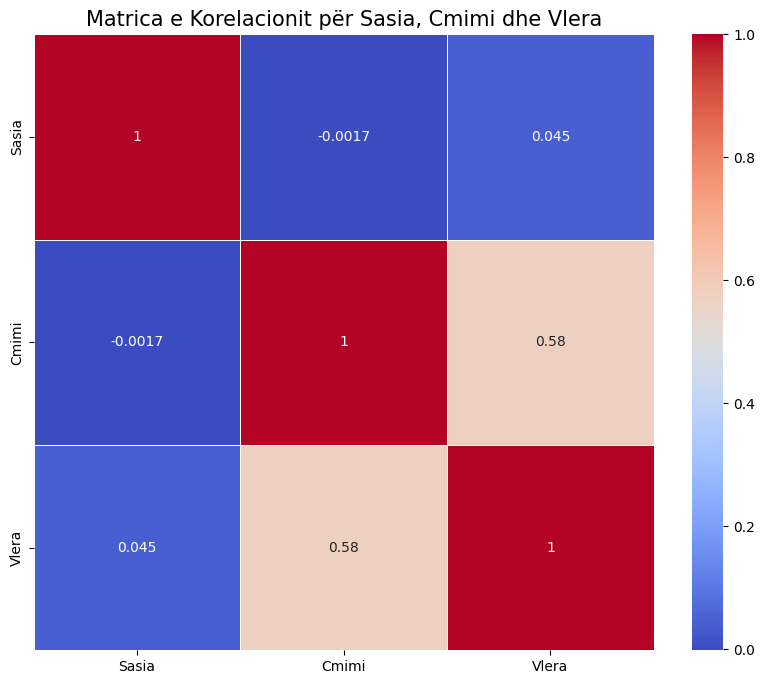

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

# Përzgjedh vetëm kolonat numerike: Sasia, Cmimi dhe Vlera
selected_columns = ['Sasia', 'Cmimi', 'Vlera']
correlation_matrix = dataset_kryesor[selected_columns].corr(numeric_only=True)

# Krijimi i heatmap për këto tri kolona
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrica e Korelacionit për Sasia, Cmimi dhe Vlera', fontsize=15)
plt.show()



### Grafiku kohor për 'DataRegjistrimit' sipas trendit në kohë

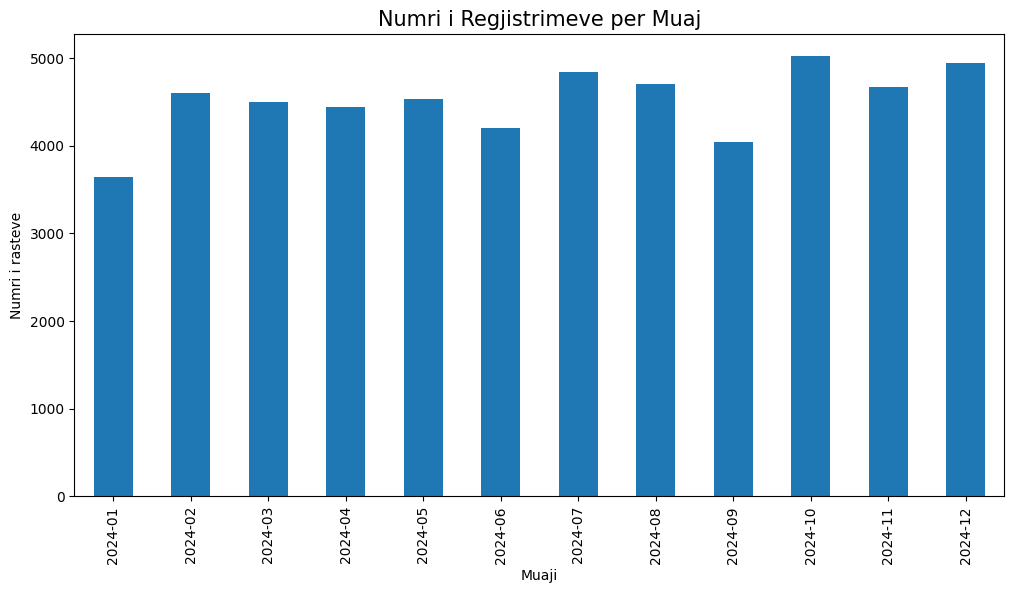

In [399]:
dataset_kryesor['DataRegjistrimit'] = pd.to_datetime(dataset_kryesor['DataRegjistrimit'])

# Numri i regjistrimeve në muaj
dataset_kryesor.groupby(dataset_kryesor['DataRegjistrimit'].dt.to_period('M')).size().plot(kind='bar', figsize=(12, 6))
plt.title('Numri i Regjistrimeve per Muaj', fontsize=15)
plt.ylabel('Numri i rasteve')
plt.xlabel('Muaji')
plt.show()


#### Krijimi i një scatter plot për të vizualizuar lidhjen midis 'Çmimi' dhe 'Vlera'

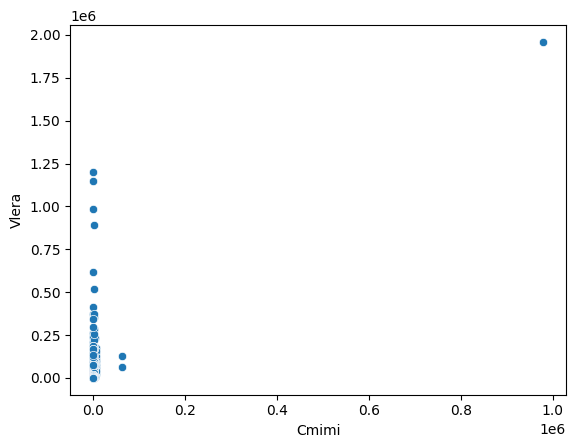

In [400]:
# Krijimi i një scatter plot për të vizualizuar lidhjen midis 'Cmimi' (çmimi për njësi) dhe 'Vlera' (çmimi total për të gjitha sasitë).
# Çdo pikë në grafik përfaqëson një rresht në dataset.
sns.scatterplot(x='Cmimi', y='Vlera', data=dataset_kryesor)

# Shfaqja e grafikut në ekran.
plt.show()

#### Përmbledhje e Vlerës sipas Operatorëve Ekonomikë

   OperatoriEkonomik         Vlera
0               OE 1  1.452110e+03
1              OE 10  3.465000e+03
2              OE 11  9.356578e+04
3              OE 12  4.413240e+03
4              OE 13  9.105693e+04
..               ...           ...
62             OE 67  9.745400e+02
63              OE 7  2.650987e+05
64              OE 8  3.420731e+05
65              OE 9  1.197165e+07
66             Oe 25  1.716141e+04

[67 rows x 2 columns]


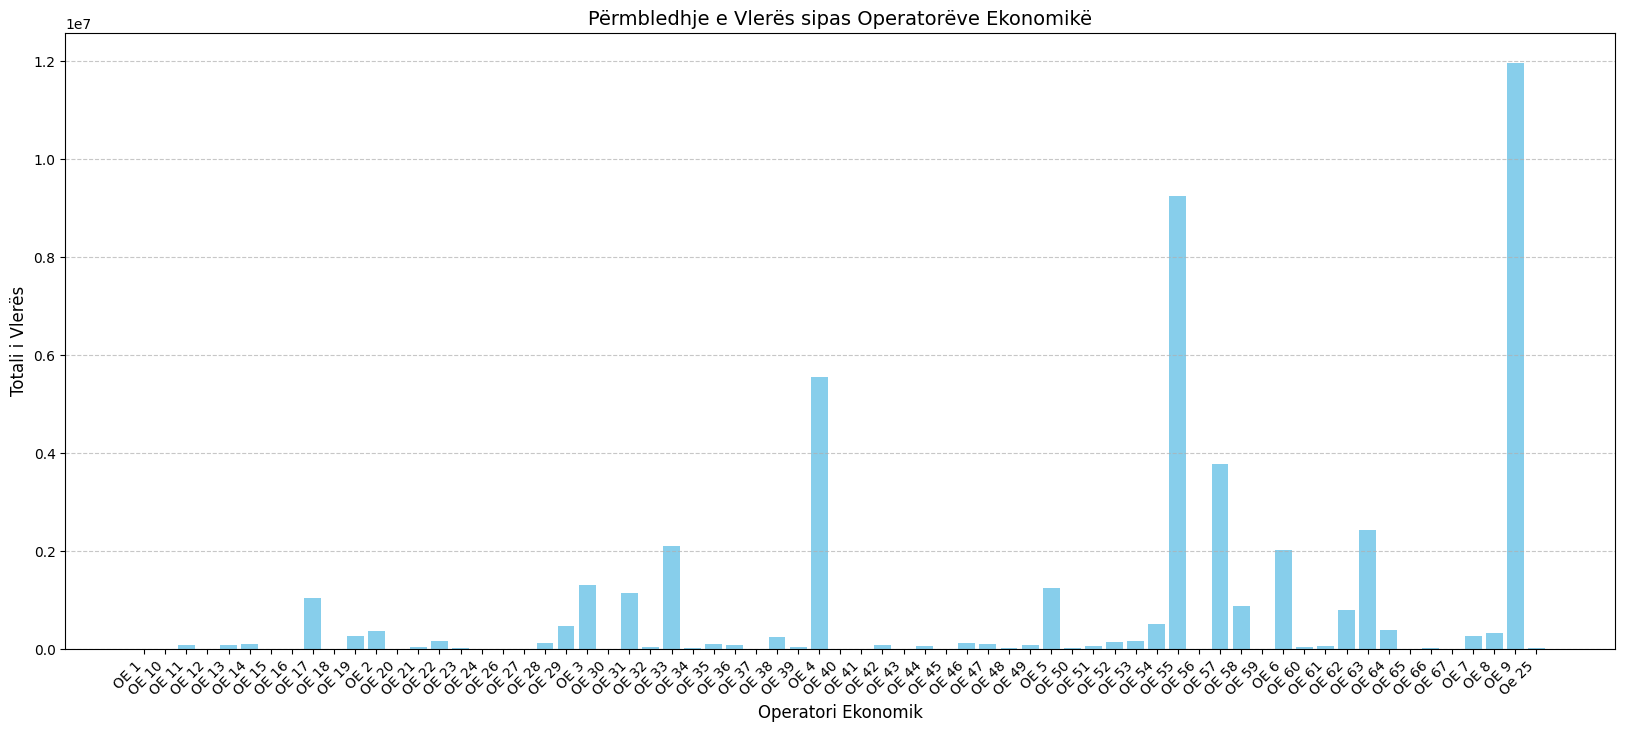

In [401]:
# Përmbledhje e 'Vlera' sipas 'OperatoriEkonomik'
operator_analysis = dataset_kryesor.groupby('OperatoriEkonomik')['Vlera'].sum().reset_index()
print(operator_analysis)

# Vizualizimi grafik
plt.figure(figsize=(20, 8))
plt.bar(operator_analysis['OperatoriEkonomik'], operator_analysis['Vlera'], color='skyblue')
plt.title('Përmbledhje e Vlerës sipas Operatorëve Ekonomikë', fontsize=14)
plt.xlabel('Operatori Ekonomik', fontsize=12)
plt.ylabel('Totali i Vlerës', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Përmbledhje e Vlerës sipas LlojiHyrjes, ArtikulliLloji, Spitalit', NjesiaReparti

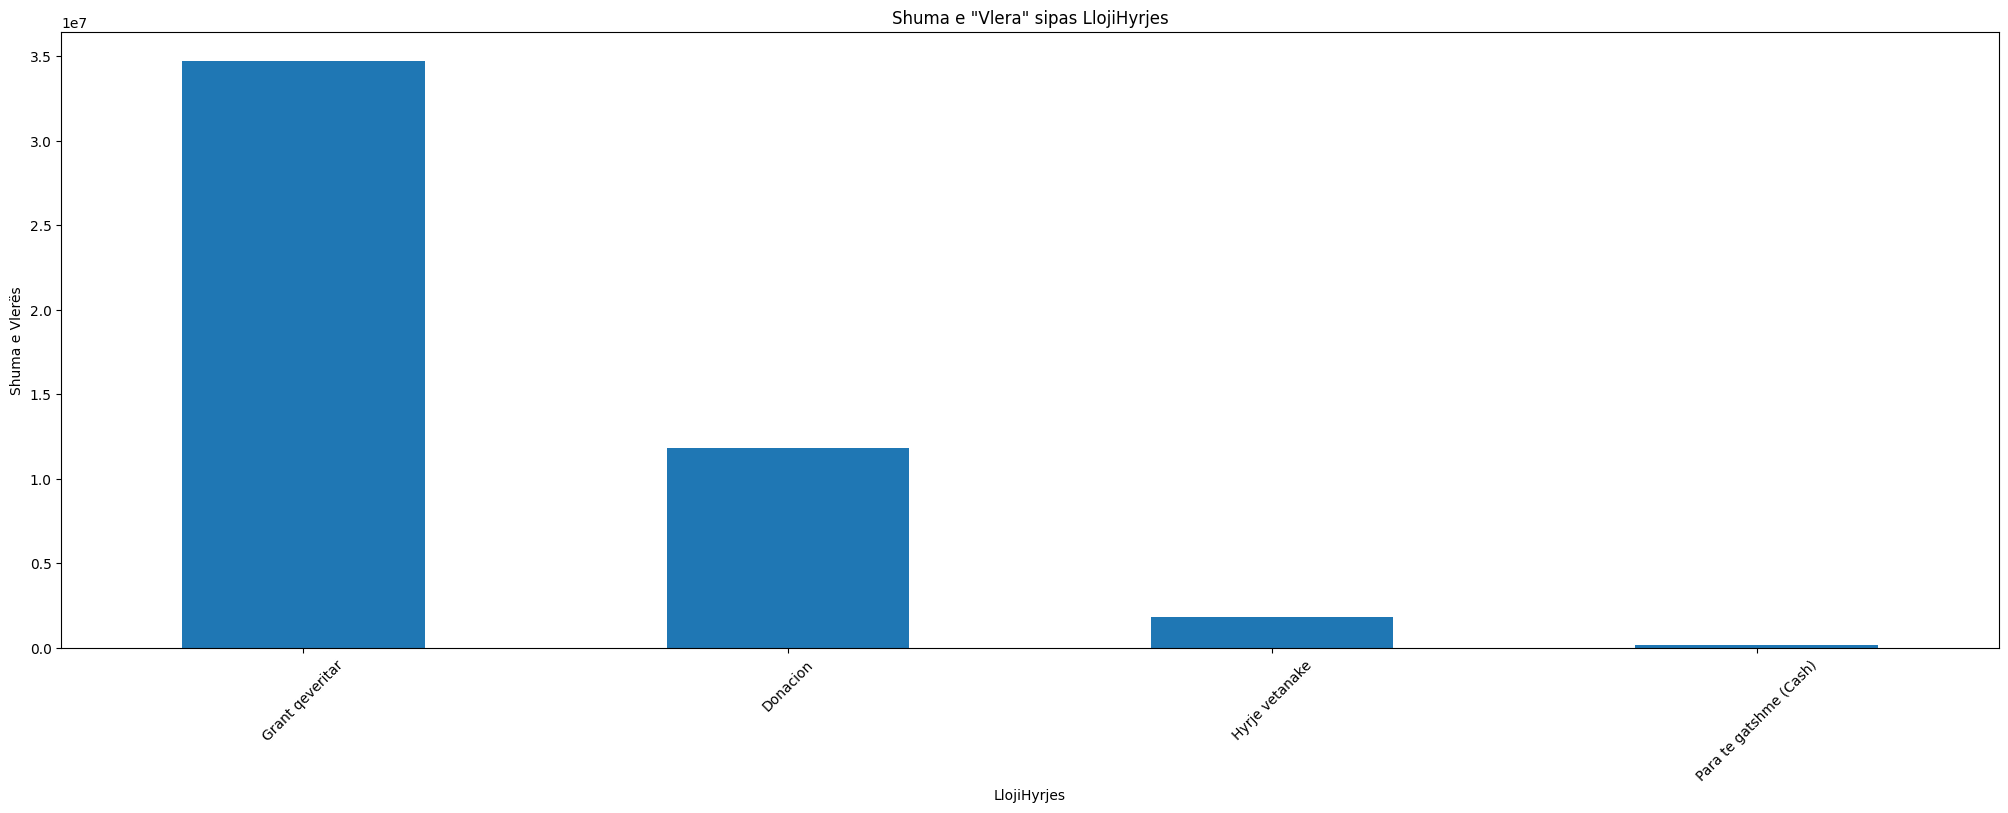

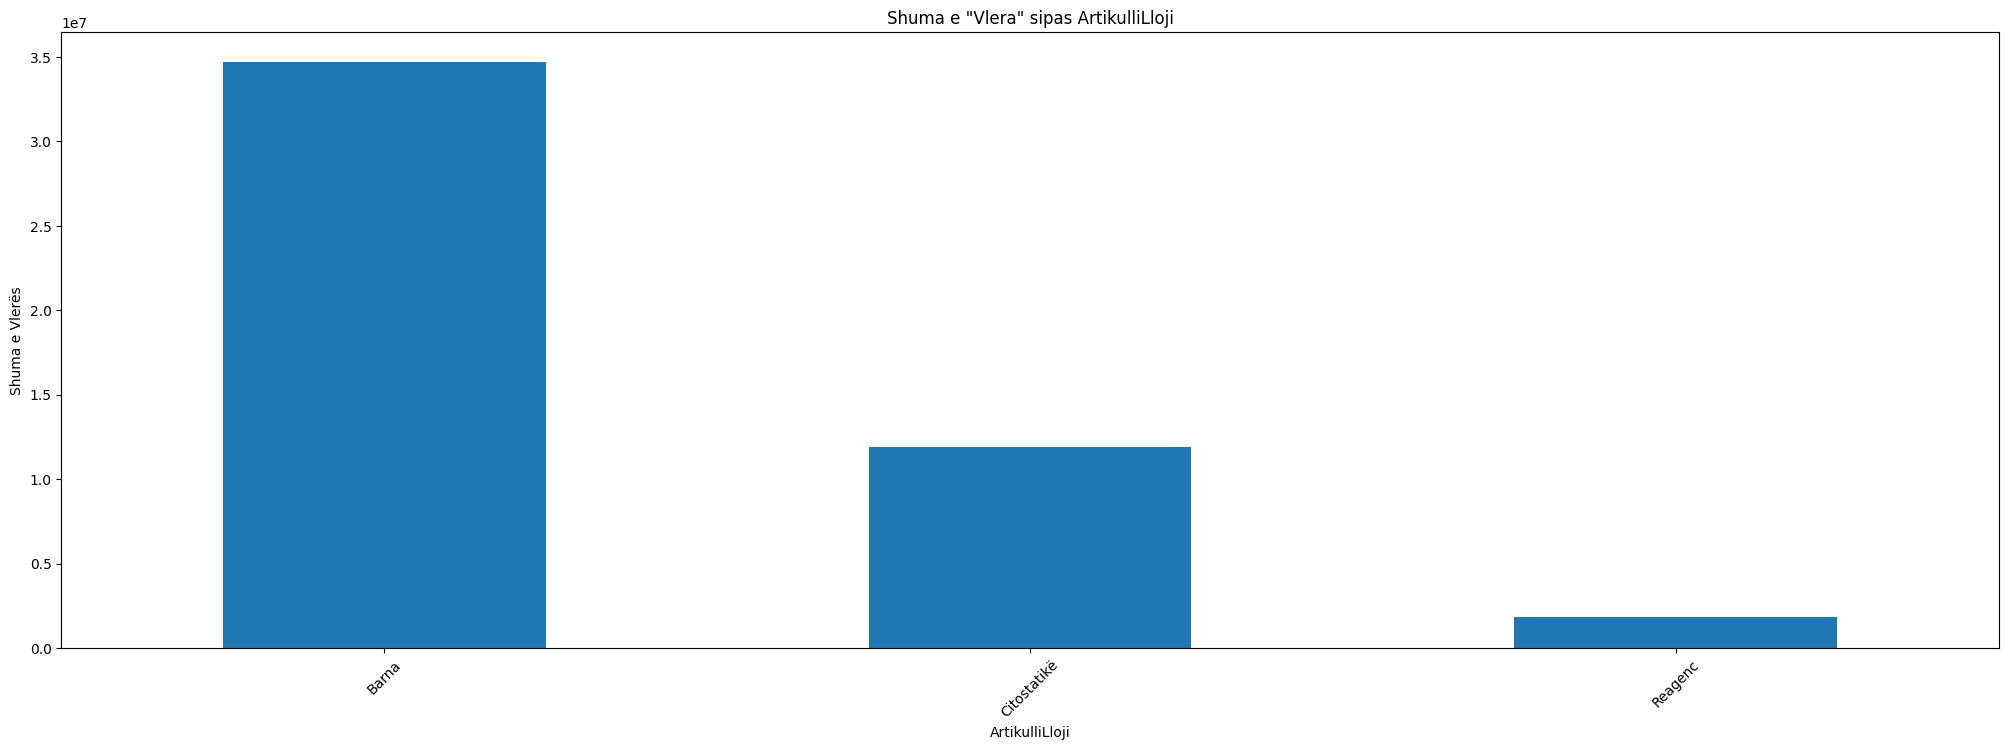

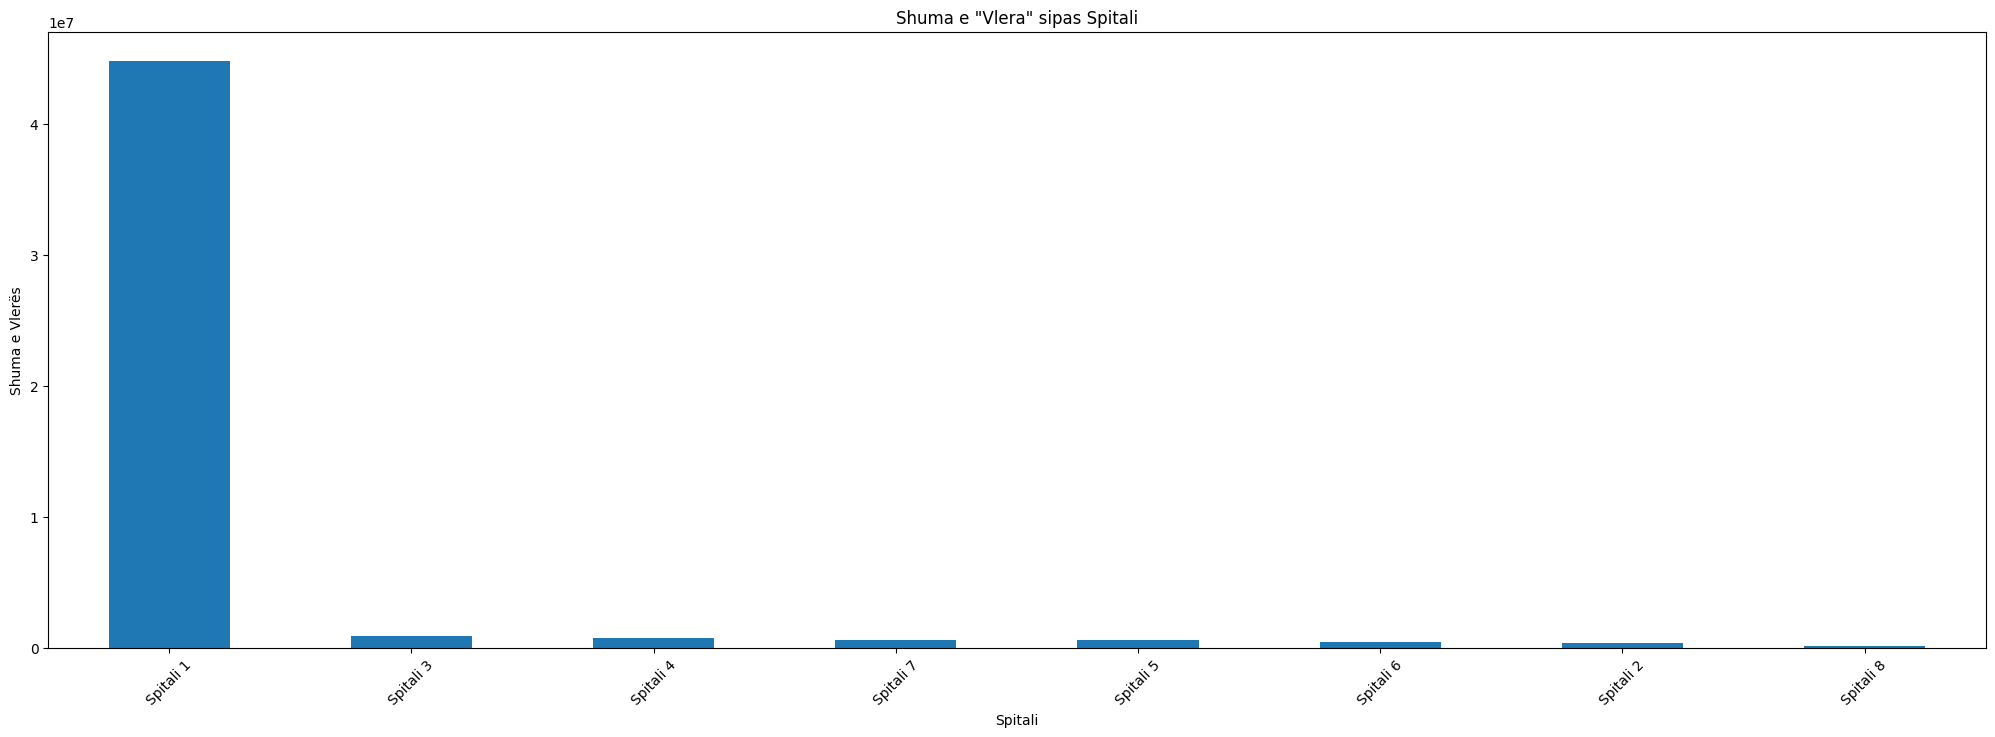

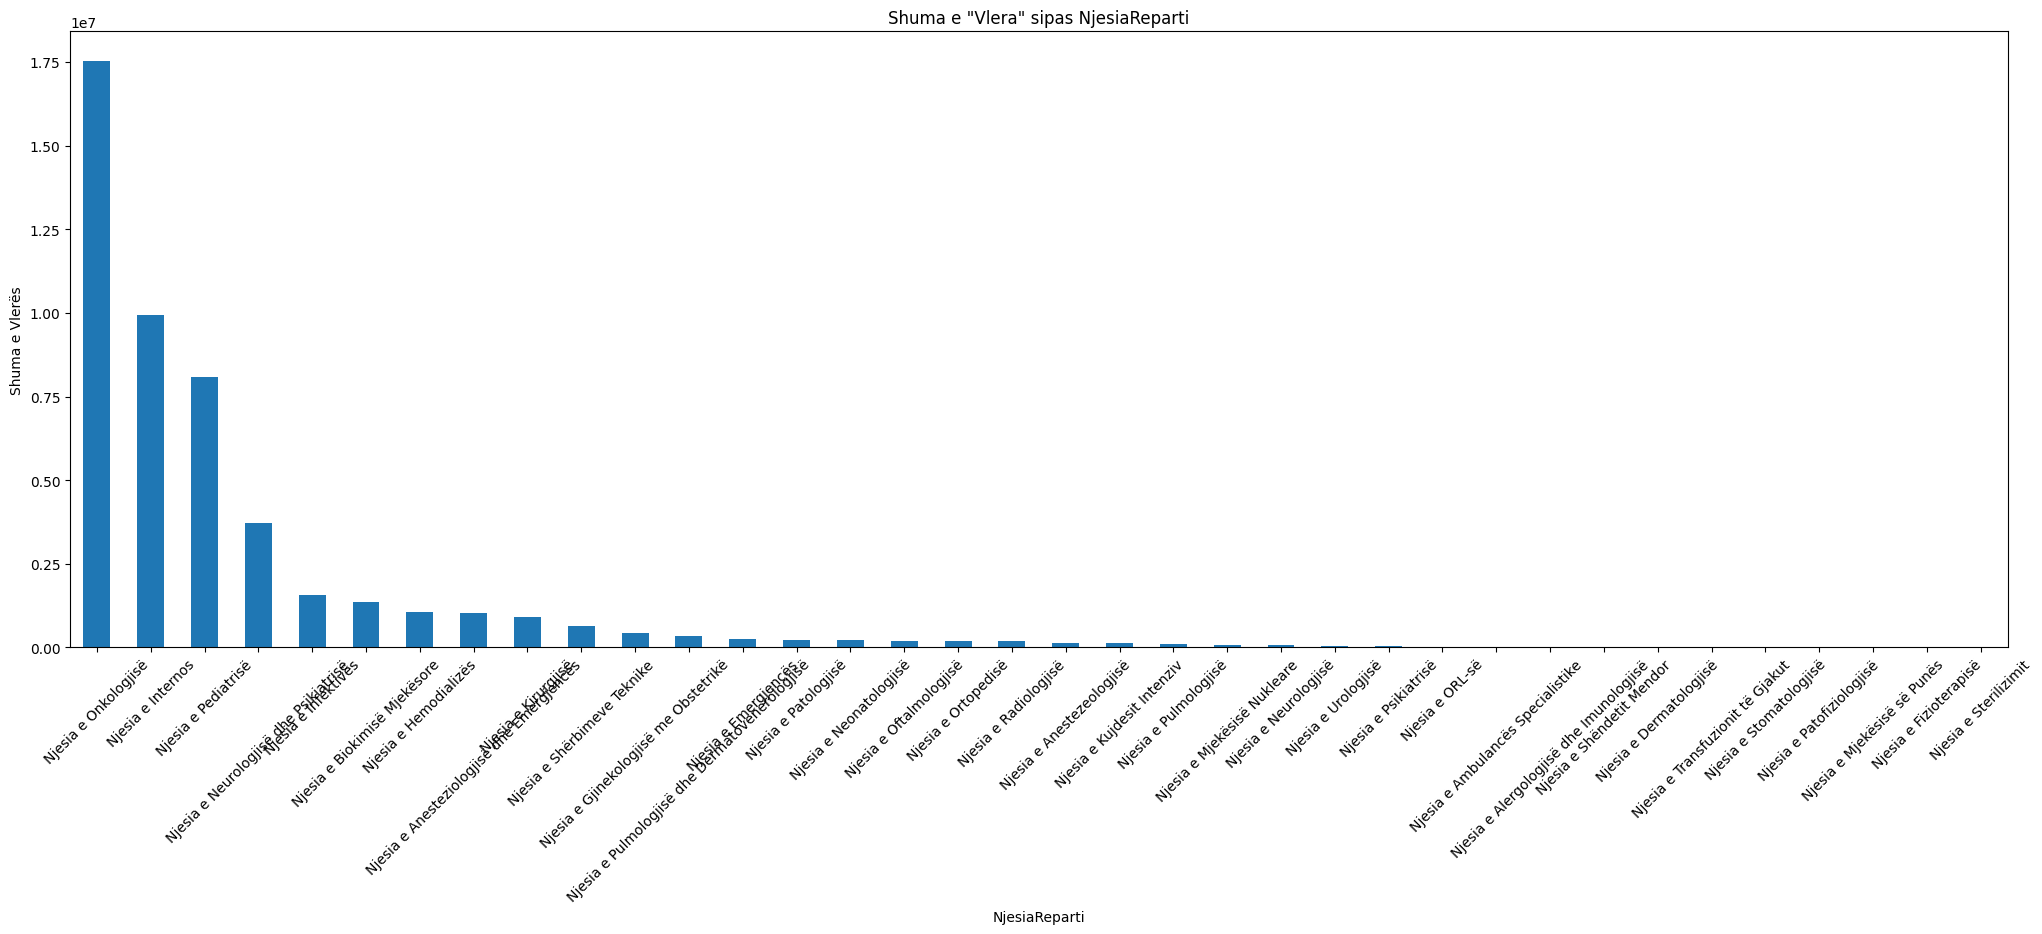

In [402]:
# Kolonat për të krijuar diagramat
columns_to_plot = ['LlojiHyrjes', 'ArtikulliLloji', 'Spitali', 'NjesiaReparti']

# Krijojmë një diagram për secilën kolonë, bazuar në shumën e "Vlera"
for col in columns_to_plot:
    plt.figure(figsize=(25, 8))
    dataset_kryesor.groupby(col)['Vlera'].sum().sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Shuma e "Vlera" sipas {col}')
    plt.xlabel(col)
    plt.ylabel('Shuma e Vlerës')
    plt.xticks(rotation=45)
    plt.show()


#### SMOTE Algorithm


📌 Numri i mostrave për secilën kategori përpara SMOTE:

Cmimi
0-1           36137
2-10          12176
11-100         3810
101-500        1462
1001-5000       262
501-1000        252
5001-10000       26
10001+            3
Name: count, dtype: int64

🔹 Numri i përshtatur i fqinjëve për SMOTE: 2


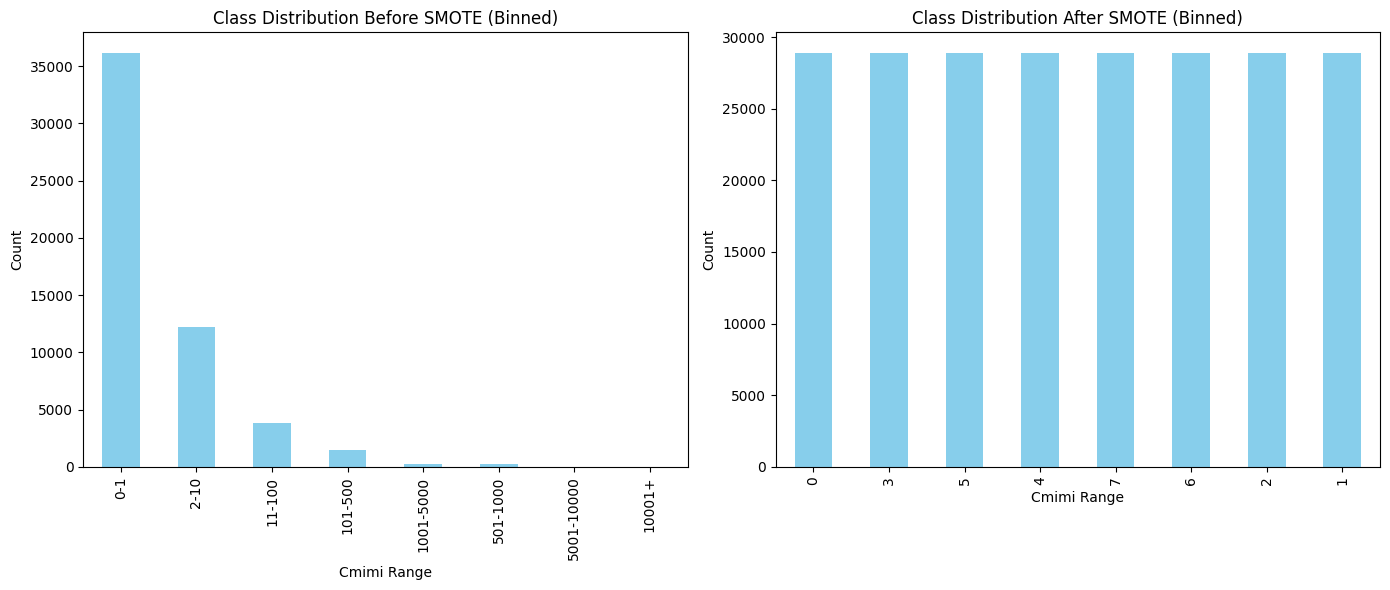

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Sigurohemi që dataset-i është i ngarkuar
if 'dataset_kryesor' not in locals():
    raise NameError("Variabla 'dataset_kryesor' nuk është e definuar. Sigurohu që dataset-i është i ngarkuar.")

# Adjust sample_size to not exceed the number of rows in the dataset
sample_size = min(100000, len(dataset_kryesor))
df_sample = dataset_kryesor.sample(sample_size, random_state=42)

# Binning 'Cmimi' into categories
bins = [0, 1, 10, 100, 500, 1000, 5000, 10000, dataset_kryesor['Cmimi'].max()]
labels = ['0-1', '2-10', '11-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+']
df_sample['Cmimi'] = pd.cut(df_sample['Cmimi'], bins=bins, labels=labels, include_lowest=True)

# Visualize class distribution before SMOTE
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
df_sample['Cmimi'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before SMOTE (Binned)')
plt.xlabel('Cmimi Range')
plt.ylabel('Count')

# Kontrollojmë numrin e mostrave për secilën kategori
print("\n📌 Numri i mostrave për secilën kategori përpara SMOTE:\n")
print(df_sample['Cmimi'].value_counts())

# Përzgjedhim vetëm kolonat numerike (për të shmangur datetime ose objektet e tjera)
numeric_cols = df_sample.select_dtypes(include=['number']).columns.tolist()
X_sample = df_sample[numeric_cols]  # Vetëm kolonat numerike

# Encode the categorical labels
le = LabelEncoder()
y_sample = le.fit_transform(df_sample['Cmimi'])

# ✅ Përdorim vetëm kolonat numerike për imputing
imputer = SimpleImputer(strategy='mean')
X_sample_imputed = pd.DataFrame(imputer.fit_transform(X_sample), columns=X_sample.columns)

# 📌 Përcakto numrin minimal të mostrave në secilën kategori për të vendosur `n_neighbors`
min_samples_per_class = min(pd.Series(y_sample).value_counts())

# ✅ Sigurohemi që `n_neighbors` është më i vogël se numri minimal i mostrave në ndonjë kategori
n_neighbors = min(5, min_samples_per_class - 1)

# Kontrollojmë vlerën e `n_neighbors`
print(f"\n🔹 Numri i përshtatur i fqinjëve për SMOTE: {n_neighbors}")

# Sigurohemi që `n_neighbors` nuk është më pak se 1
if n_neighbors < 1:
    print("⚠ Gabim: Disa kategori kanë shumë pak të dhëna për SMOTE. Korrigjoni datasetin ose përdorni një metodë tjetër të balancimit.")
else:
    # Split the sample dataset into training and testing sets
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
        X_sample_imputed, y_sample, test_size=0.2, random_state=42
    )

    # Applying SMOTE to balance the sample dataset
    smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
    X_train_resampled_sample, y_train_resampled_sample = smote.fit_resample(
        X_train_sample, y_train_sample
    )

    # Second subplot for post-SMOTE distribution
    plt.subplot(1, 2, 2)
    pd.Series(y_train_resampled_sample).value_counts().plot(kind='bar', color='skyblue')
    plt.title('Class Distribution After SMOTE (Binned)')
    plt.xlabel('Cmimi Range')
    plt.ylabel('Count')

    plt.tight_layout()  # Adjust layout to make it neat
    plt.show()


### Boxplot për të parë Outliers për çdo kolonë numerike

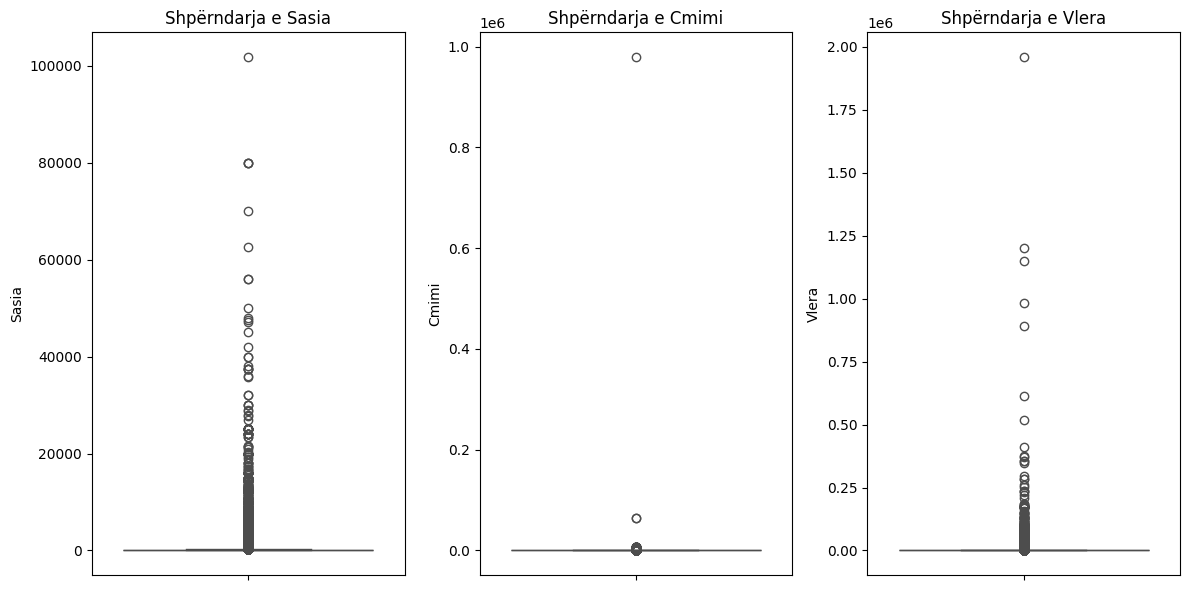

In [404]:
# ✅ Vizualizimi i outliers me boxplot (vertikalisht) për secilën kolonë numerike

# ✅ Përzgjedh kolonat numerike
numeric_columns = ['Sasia', 'Cmimi', 'Vlera']

# ✅ Krijimi i boxplot për secilën kolonë në mënyrë vertikale
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=dataset_kryesor[col], color="red")
    plt.title(f'Shpërndarja e {col}')

plt.tight_layout()
plt.show()

### Boxplot për të parë Outliers për çdo kolonë numerike

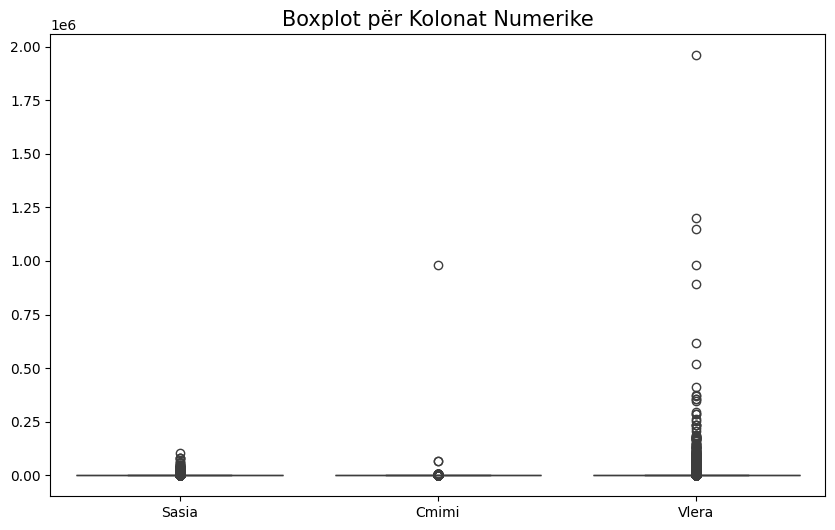

In [405]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_kryesor[['Sasia', 'Cmimi', 'Vlera']])
plt.title('Boxplot për Kolonat Numerike', fontsize=15)
plt.show()

In [406]:
dataset_kryesor['Z_Score'] = np.abs(stats.zscore(dataset_kryesor['Cmimi'], nan_policy='omit'))
threshold = 3
outliers_z = dataset_kryesor[dataset_kryesor['Z_Score'] > threshold]
print("Outliers identified by Z-Score method:")
display(outliers_z.head())

Outliers identified by Z-Score method:


,Spitali,NjesiaReparti,LlojiHyrjes,OperatoriEkonomik,DataRegjistrimit,ArtikulliLloji,Artikulli,Sasia,Cmimi,Vlera,...,Cmimi_scaled,Vlera_scaled,Sasia_normalizuar,Cmimi_normalizuar,Vlera_normalizuar,Sasia_diskrete,Cmimi_diskret,Vlera_diskrete,Vlera_binare,Z_Score
3835,Spitali 1,Njesia e Pediatrisë,Donacion,OE 19,2024-09-18,Barna,M09AX07 - Spinraza 12mg - Ampullë,2.0,64316.97,128633.94,...,0.065655,0.065655,0.000016,0.065655,0.065655,E vogël,I lartë,E lartë,1,15.176531
4033,Spitali 1,Njesia e Pediatrisë,Donacion,OE 33,2024-03-05,Barna,M09AX09 - Onasemnogene abeparvovec 10^13 vecto...,2.0,979616.75,1959233.50,...,1.000000,1.000000,0.000016,1.000000,1.000000,E vogël,I lartë,E lartë,1,231.311275
4120,Spitali 1,Njesia e Pediatrisë,Donacion,OE 19,2024-01-09,Barna,M09AX07 - Spinraza 12mg - Ampullë,1.0,64316.97,64316.97,...,0.065655,0.032828,0.000006,0.065655,0.032828,Shumë e vogël,I lartë,E lartë,1,15.176531


### Skewness Data per Sasia, Cmimi, Vlera

In [407]:

# Select numerical columns
numerical_cols = ["Sasia", "Cmimi", "Vlera"]

# Calculate skewness
skewness_values = dataset_kryesor[numerical_cols].apply(lambda x: skew(x, nan_policy='omit'))

# Print skewness values
print(skewness_values)


Sasia     23.214523
Cmimi    228.780888
Vlera     73.256694
dtype: float64


In [408]:
num_product_types = dataset_kryesor["ArtikulliLloji"].nunique()
print(f"Number of unique Artikull Lloji: {num_product_types}")


Number of unique Artikull Lloji: 3


In [409]:
product_type_counts = dataset_kryesor["ArtikulliLloji"].value_counts()
print(product_type_counts)


ArtikulliLloji
Barna          50053
Reagenc         2612
Citostatikë     1463
Name: count, dtype: int64


In [410]:
# Filter only Barna
barna_df = dataset_kryesor[dataset_kryesor["ArtikulliLloji"].str.contains("Barna", na=False)]

# Select numerical columns
numerical_cols = ["Sasia", "Cmimi", "Vlera"]

# Calculate skewness grouped by "Artikull Lloji"
barna_skewness = barna_df.groupby("ArtikulliLloji")[numerical_cols].apply(lambda x: skew(x, nan_policy='omit'))

# Convert to DataFrame
barna_skewness_df = pd.DataFrame(barna_skewness.tolist(), index=barna_skewness.index, columns=numerical_cols)

# Print skewness values per "Artikull Lloji"
print(barna_skewness_df)


                    Sasia       Cmimi      Vlera
ArtikulliLloji                                  
Barna           24.478873  220.385606  87.491636


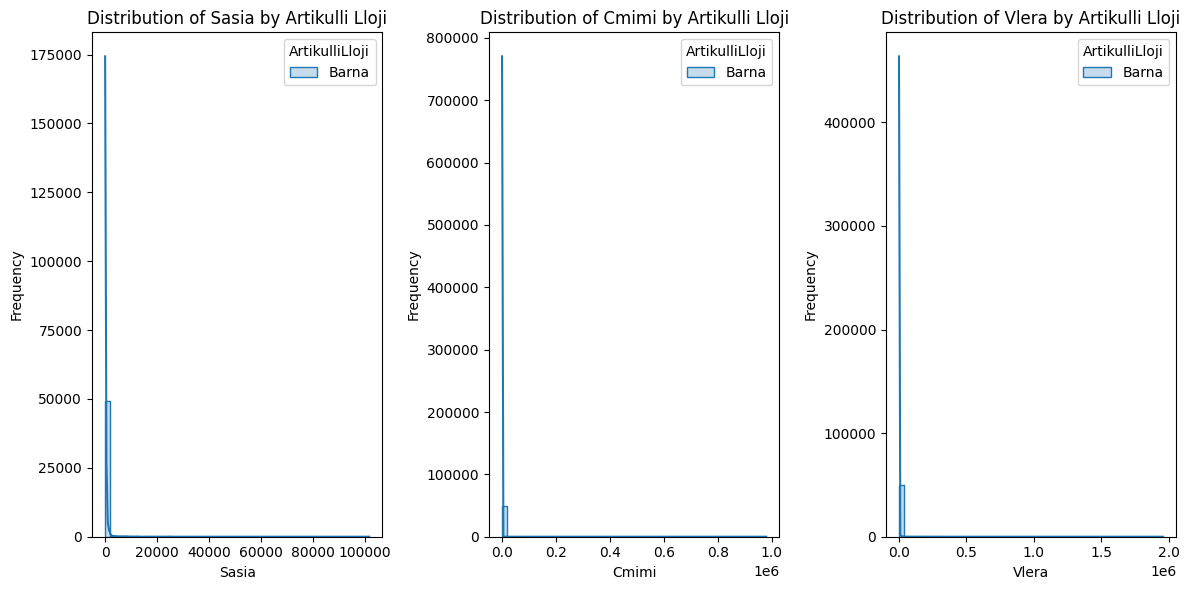

In [411]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(["Sasia", "Cmimi", "Vlera"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=barna_df, x=col, hue="ArtikulliLloji", bins=50, kde=True, element="step")
    plt.title(f"Distribution of {col} by Artikulli Lloji")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    #plt.legend(title="Barna")

plt.tight_layout()
plt.show()


### Identifikimi i outlaires duke perdorur IQR (InterQuartile Range)

In [412]:
# Funksion për të gjetur dhe shfaqur outliers për një kolonë të dhënë me Z-Score
def display_outliers_zscore(df, column, threshold=3):
    # Llogarit Z-score për kolonën
    z_scores = stats.zscore(df[column].dropna())  # heq vlerat NaN para llogaritjes
    abs_z_scores = abs(z_scores)

    # Gjej outliers ku Z-score absolut është më i madh se pragu (zakonisht 3)
    outliers = df.loc[abs_z_scores > threshold, [column]]
    print(f"\nOutliers për kolonën '{column}' me Z-Score > {threshold}: ({outliers.shape[0]} rreshta)")
    display(outliers)

# Lista e kolonave numerike për të analizuar
kolonat_numerike = ['Sasia', 'Cmimi', 'Vlera']

# Zbatimi i funksionit për secilën kolonë
for kolona in kolonat_numerike:
    display_outliers_zscore(dataset_kryesor, kolona)



Outliers për kolonën 'Sasia' me Z-Score > 3: (480 rreshta)


,Sasia
383,7500.0
527,12500.0
679,7500.0
1761,12500.0
1763,12500.0
...,...
52631,7000.0
52635,7000.0
52639,6000.0
52645,6000.0



Outliers për kolonën 'Cmimi' me Z-Score > 3: (3 rreshta)


,Cmimi
3835,64316.97
4033,979616.75
4120,64316.97



Outliers për kolonën 'Vlera' me Z-Score > 3: (184 rreshta)


,Vlera
2504,112513.7000
2656,95530.5000
3285,69268.8672
3835,128633.9400
3887,54604.8000
...,...
11180,66722.0000
28572,73000.0000
28640,73000.0000
28688,67598.0000


## Gjenerimi i të dhënave sintetike me shpërndarje normale dhe identifikimi i outliers

### Hapat e ndjekura:

1. **Gjenerimi i të dhënave sintetike** me shpërndarje normale dhe shtimi i disa outliers.
2. Llogaritja e statistikave kryesore:
   - **Mesatarja (Mean)**
   - **Mediana (Median)**
   - **Devijimi Standard (Standard Deviation, Std)**
3. **Identifikimi i outliers** duke përdorur **Z-score > 3**.
4. **Shfaqja e outliers** në output (print).
5. **Vizualizimi grafik**:
   - **Histogram me KDE (Density Curve)**, ku do të paraqiten:
     - Mesatarja
     - Mediana
     - Vijat për Z-score (pragu ±3 devijime standarde)
   - **Violin plot**, që tregon shpërndarjen dhe outliers në mënyrë më të qartë.

Outliers të gjetur (Z-Score > 3):
             Vlera  Outlier
2504   112513.7000     True
2656    95530.5000     True
3285    69268.8672     True
3835   128633.9400     True
3887    54604.8000     True
...            ...      ...
11180   66722.0000     True
28572   73000.0000     True
28640   73000.0000     True
28688   67598.0000     True
28707   73000.0000     True

[184 rows x 2 columns]


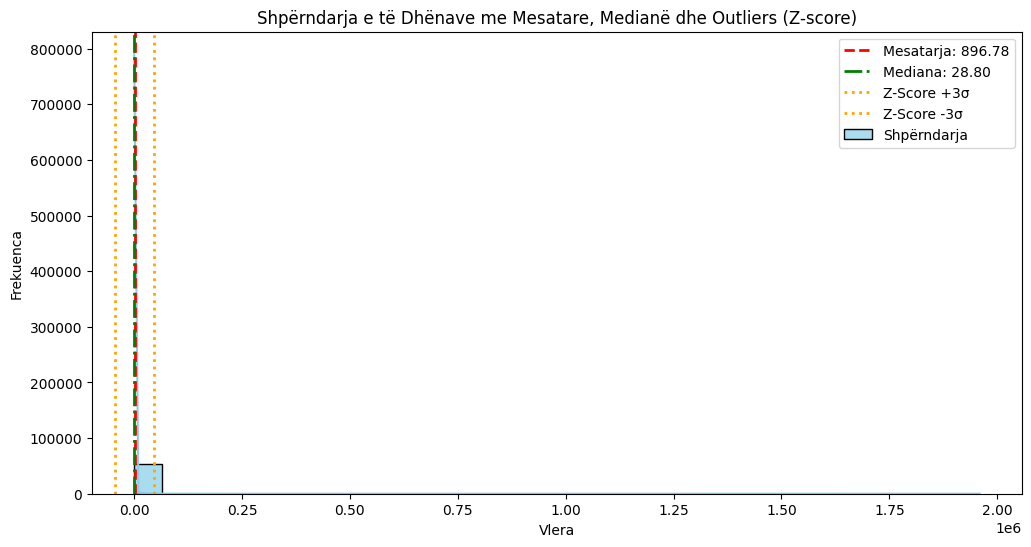

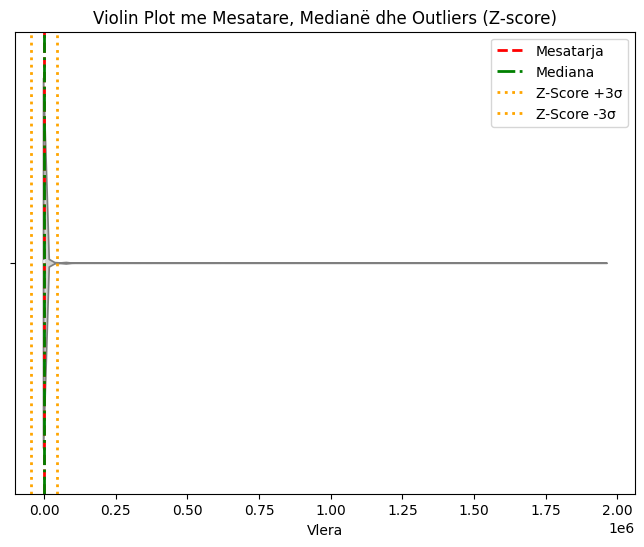

In [413]:
# Puno me kolonën 'Vlera'
df = dataset_kryesor[['Vlera']].copy()

# Llogarit statistikat
mean = df['Vlera'].mean()
median = df['Vlera'].median()
std = df['Vlera'].std()

# Llogarit Z-score dhe outliers
z_scores = stats.zscore(df['Vlera'])
threshold = 3
df['Outlier'] = abs(z_scores) > threshold

# Printo outliers
print(f"Outliers të gjetur (Z-Score > {threshold}):")
print(df[df['Outlier']])

# 📊 Vizualizimi me grafik

plt.figure(figsize=(12, 6))

# Histogram me KDE (Density Curve)
sns.histplot(df['Vlera'], bins=30, kde=True, color='skyblue', alpha=0.7, label='Shpërndarja')

# Vizat mesatares dhe medianes
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mesatarja: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {median:.2f}')

# Vizat e pragut të Z-score (p.sh. 3 devijime standarde larg mesatares)
plt.axvline(mean + threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score +{threshold}σ')
plt.axvline(mean - threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score -{threshold}σ')

plt.title('Shpërndarja e të Dhënave me Mesatare, Medianë dhe Outliers (Z-score)')
plt.xlabel('Vlera')
plt.ylabel('Frekuenca')
plt.legend()
plt.show()

# 🔵 Violin Plot për pamje më të mirë të shpërndarjes dhe outliers
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Vlera'], inner='box', color='lightgray')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Mesatarja')
plt.axvline(median, color='green', linestyle='-.', linewidth=2, label='Mediana')
plt.axvline(mean + threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score +{threshold}σ')
plt.axvline(mean - threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score -{threshold}σ')
plt.legend()
plt.title('Violin Plot me Mesatare, Medianë dhe Outliers (Z-score)')
plt.show()


### Kodi per krijimin e dataset pa outlaiers dhe dataset vetem me outlaiers

In [414]:

kolona_per_outliers = 'Vlera'

# Llogarit Z-score vetëm për kolonën e zgjedhur
z_scores = stats.zscore(dataset_kryesor[kolona_per_outliers])

# Pragu për Z-score
threshold = 3

# ✅ Krijo maska:
# - Rreshtat që NUK janë outliers
mask_no_outliers = abs(z_scores) <= threshold

# - Rreshtat që JANË outliers
mask_outliers = abs(z_scores) > threshold

# ✅ Dataset pa outliers (të gjitha kolonat)
dataset_pa_outliers = dataset_kryesor[mask_no_outliers].copy()

# ✅ Dataset vetëm me outliers (të gjitha kolonat)
dataset_outliers = dataset_kryesor[mask_outliers].copy()

# ✅ Krijo folderin nëse nuk ekziston
output_folder = 'data_preprocessed'
os.makedirs(output_folder, exist_ok=True)

# Rrugët për ruajtje
path_pa_outliers = os.path.join(output_folder, 'dataset_kryesor_pa_outliers.csv')
path_outliers = os.path.join(output_folder, 'dataset_kryesor_veç_outliers.csv')

# ✅ Ruajtja në CSV
dataset_pa_outliers.to_csv(path_pa_outliers, index=False)
dataset_outliers.to_csv(path_outliers, index=False)

# ✅ Print konfirmimi
print(f"✅ Dataset pa outliers u ruajt me sukses në: '{path_pa_outliers}' (rreshta: {dataset_pa_outliers.shape[0]})")
print(f"✅ Dataset me vetëm outliers u ruajt me sukses në: '{path_outliers}' (rreshta: {dataset_outliers.shape[0]})")
print(f"📊 Totali fillestar i rreshtave: {dataset_kryesor.shape[0]}")


✅ Dataset pa outliers u ruajt me sukses në: 'data_preprocessed\dataset_kryesor_pa_outliers.csv' (rreshta: 53944)
✅ Dataset me vetëm outliers u ruajt me sukses në: 'data_preprocessed\dataset_kryesor_veç_outliers.csv' (rreshta: 184)
📊 Totali fillestar i rreshtave: 54128


### Paraqitja e grafikut nga dataseti i pastruar pa outlaiers

Outliers të gjetur (Z-Score > 3):
           Vlera  Outlier
289     6901.605     True
511    13394.430     True
594     7612.920     True
640    12317.130     True
784     6912.000     True
...          ...      ...
51970   7300.000     True
51981   7300.000     True
52006   7154.000     True
52010   7592.000     True
52019   8030.000     True

[675 rows x 2 columns]


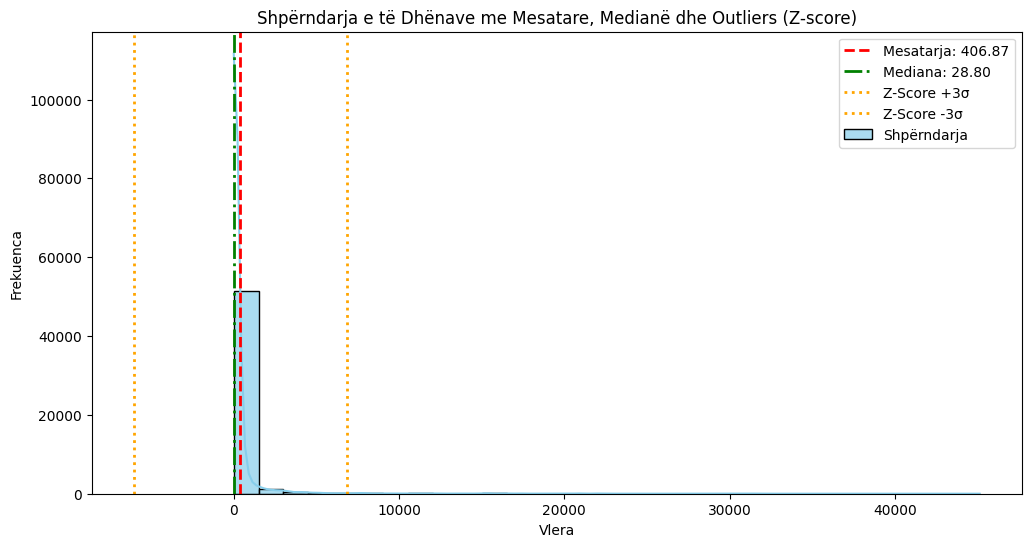

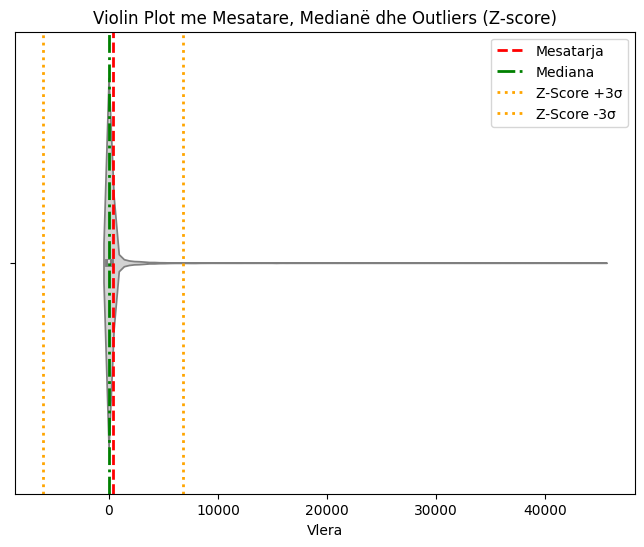

In [415]:
# 🔽 KETU ndrysho path-in sipas rrugës ku e ke datasetin real
dataset_kryesor_pa_outlaiers = pd.read_csv('data_preprocessed/dataset_kryesor_pa_outliers.csv', encoding='latin1')

# Puno me kolonën 'Vlera'
df = dataset_kryesor_pa_outlaiers[['Vlera']].copy()

# Llogarit statistikat
mean = df['Vlera'].mean()
median = df['Vlera'].median()
std = df['Vlera'].std()

# Llogarit Z-score dhe outliers
z_scores = stats.zscore(df['Vlera'])
threshold = 3
df['Outlier'] = abs(z_scores) > threshold

# Printo outliers
print(f"Outliers të gjetur (Z-Score > {threshold}):")
print(df[df['Outlier']])

# 📊 Vizualizimi me grafik

plt.figure(figsize=(12, 6))

# Histogram me KDE (Density Curve)
sns.histplot(df['Vlera'], bins=30, kde=True, color='skyblue', alpha=0.7, label='Shpërndarja')

# Vizat mesatares dhe medianes
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mesatarja: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {median:.2f}')

# Vizat e pragut të Z-score (p.sh. 3 devijime standarde larg mesatares)
plt.axvline(mean + threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score +{threshold}σ')
plt.axvline(mean - threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score -{threshold}σ')

plt.title('Shpërndarja e të Dhënave me Mesatare, Medianë dhe Outliers (Z-score)')
plt.xlabel('Vlera')
plt.ylabel('Frekuenca')
plt.legend()
plt.show()

# 🔵 Violin Plot për pamje më të mirë të shpërndarjes dhe outliers
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Vlera'], inner='box', color='lightgray')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Mesatarja')
plt.axvline(median, color='green', linestyle='-.', linewidth=2, label='Mediana')
plt.axvline(mean + threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score +{threshold}σ')
plt.axvline(mean - threshold * std, color='orange', linestyle=':', linewidth=2, label=f'Z-Score -{threshold}σ')
plt.legend()
plt.title('Violin Plot me Mesatare, Medianë dhe Outliers (Z-score)')
plt.show()
